In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import calendar

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


In [8]:
data = pd.read_csv('/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv')


In [9]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [10]:
data.shape

(40000, 25)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [14]:
data.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [16]:
data.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [21]:
columns_to_drop=['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
data=data.drop(columns_to_drop, axis=1)

In [23]:
data.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Anomaly Scores            0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Log Source                0
dtype: int64

In [24]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",Firewall


In [26]:
data.duplicated().sum()

0

In [27]:
# Convert the 'Timestamp' column to a datetime object during DataFrame creation
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [32]:
print(attack_counts)

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


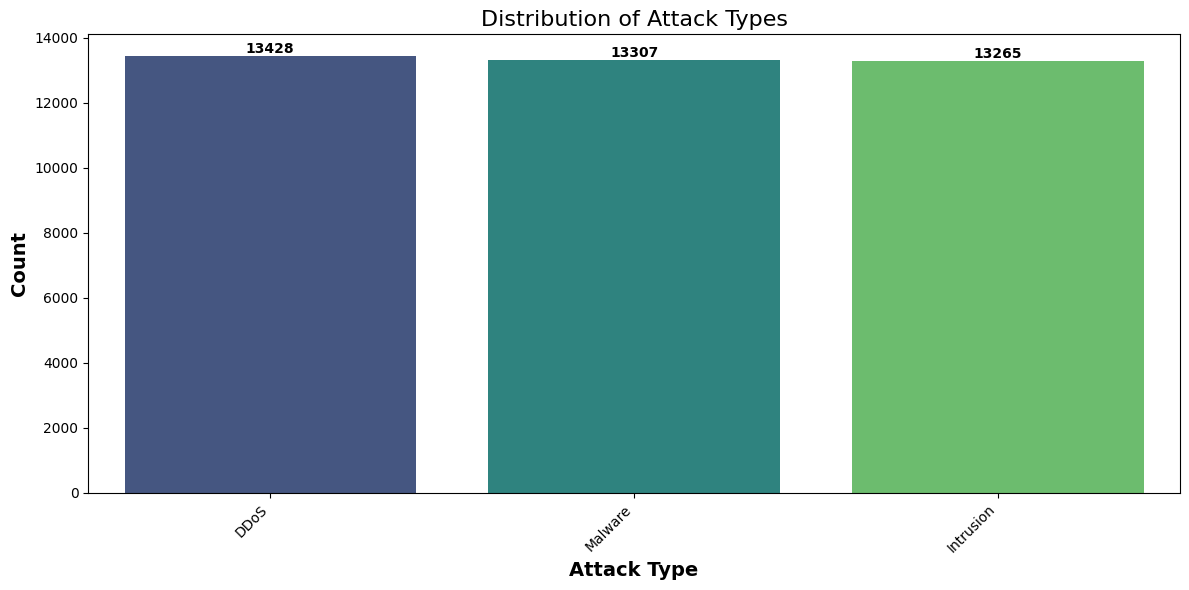

In [33]:
attack_counts = data['Attack Type'].value_counts()

# Set a color palette for the plot
colors = sns.color_palette('viridis', len(attack_counts))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts, palette=colors)

# Adding data labels
for i, count in enumerate(attack_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels and title
plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

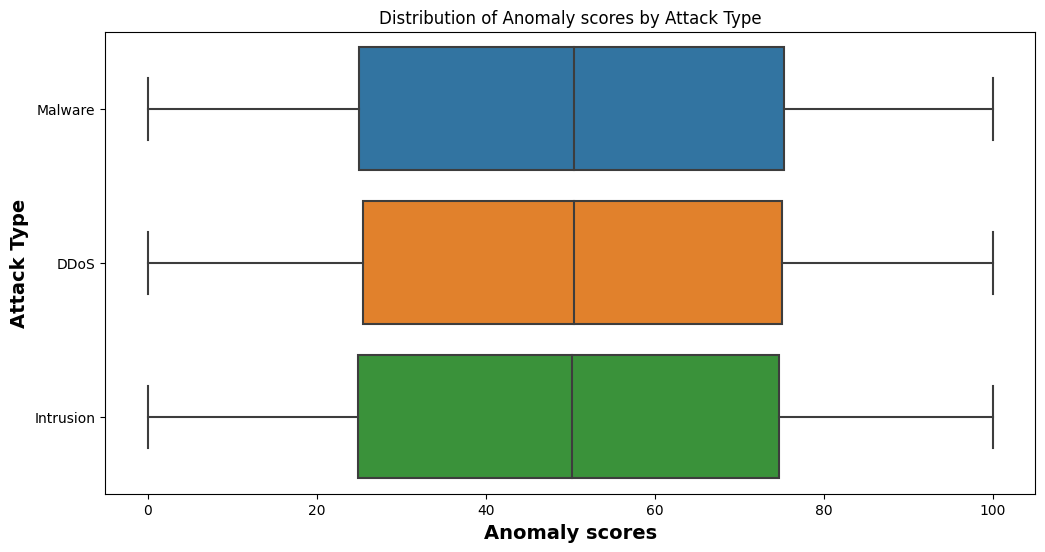

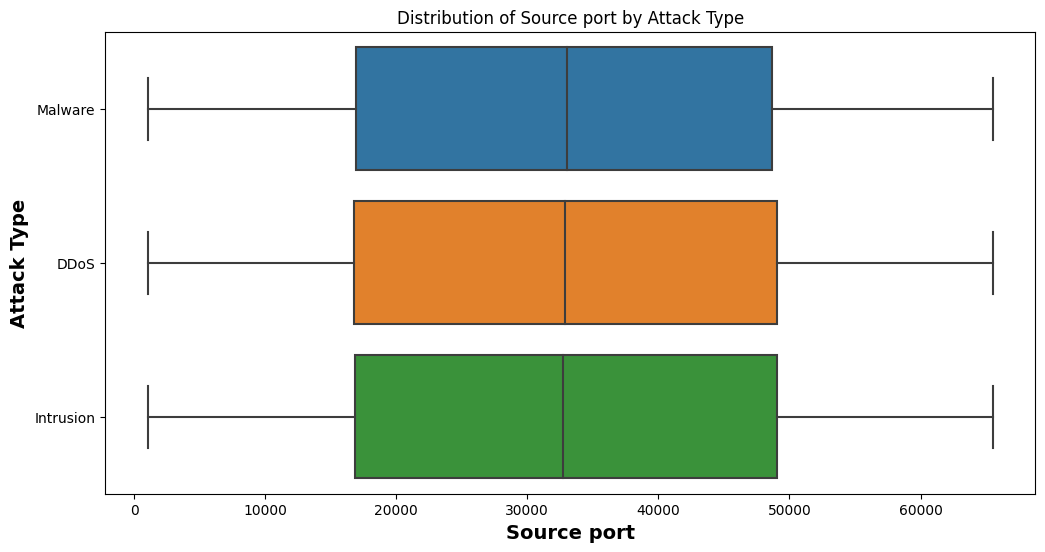

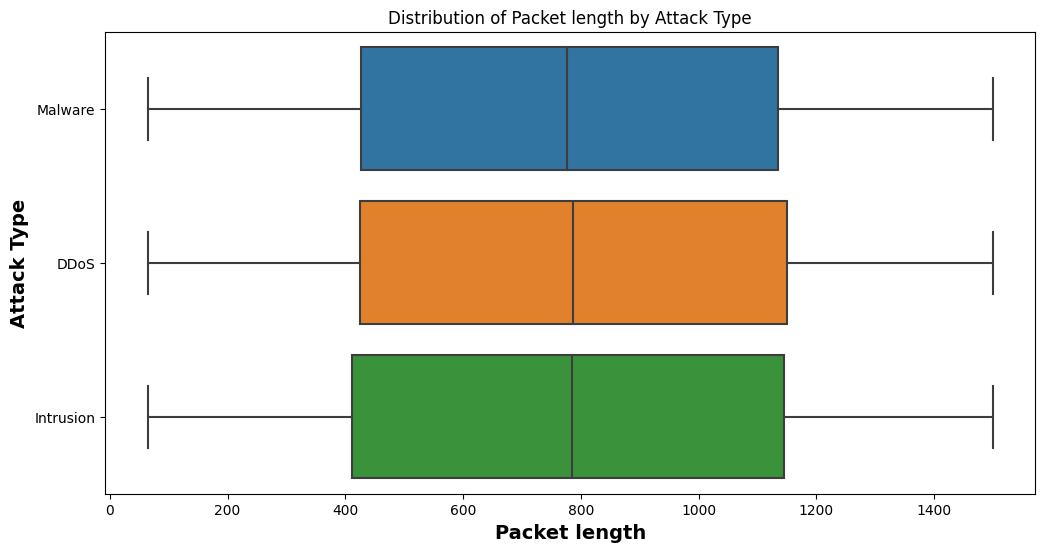

In [35]:
# Columns to plot
columns = ['Anomaly Scores', 'Source Port', 'Packet Length']

# Plotting box plot for each column
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=col, y='Attack Type', showfliers=False)  # Set showfliers=False to exclude outliers
    plt.title(f'Distribution of {col.capitalize()} by Attack Type')
    plt.xlabel(col.capitalize(), fontsize=14, fontweight='bold')
    plt.ylabel('Attack Type', fontsize=14, fontweight='bold')
    plt.show()


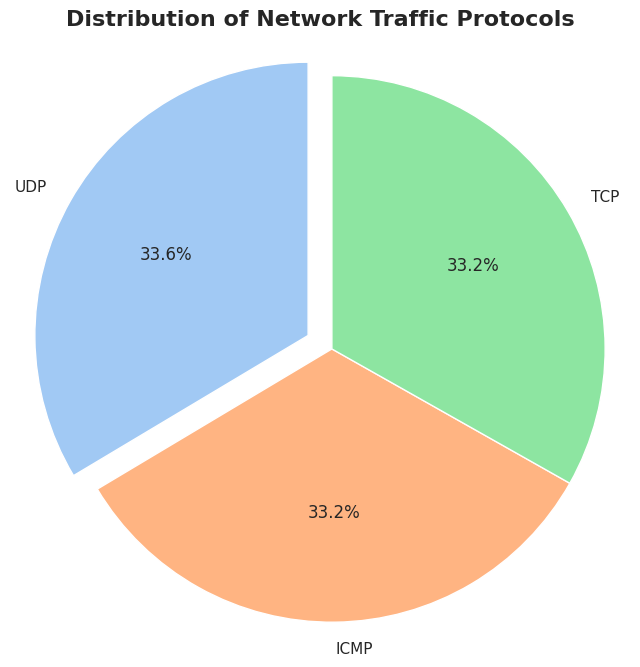

In [37]:
# Data for the pie chart
labels = ['UDP', 'ICMP', 'TCP']
sizes = data['Protocol'].value_counts()  # Proportional sizes of each category
explode = (0.1, 0, 0)  # Explode the 1st slice (UDP) for emphasis

# Set a custom color palette
colors = sns.color_palette('pastel')[0:len(labels)]

# Set seaborn style for a creative theme
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of Network Traffic Protocols', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()


In [55]:
# Create 'Year' and 'Month' columns
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month_name()

In [62]:
# Generate a pivot table
pivot_table = pd.pivot_table(data, values='Timestamp', index='Year', columns='Month', aggfunc='count', fill_value=0)

# Display the pivot table
print("Pivot Table - Year vs Month:")
print(pivot_table)

Pivot Table - Year vs Month:
Month  April  August  December  February  January  July  June  March  May  \
Year                                                                        
2020     825     904       924       830      814   880   889    906  904   
2021     865     898       851       788      858   904   929    902  874   
2022     884     905       900       807      883   950   928    925  909   
2023     847     908         0       807      823   889   863    945  908   

Month  November  October  September  
Year                                 
2020        915      905        877  
2021        869      891        909  
2022        919      897        843  
2023          0      296        853  


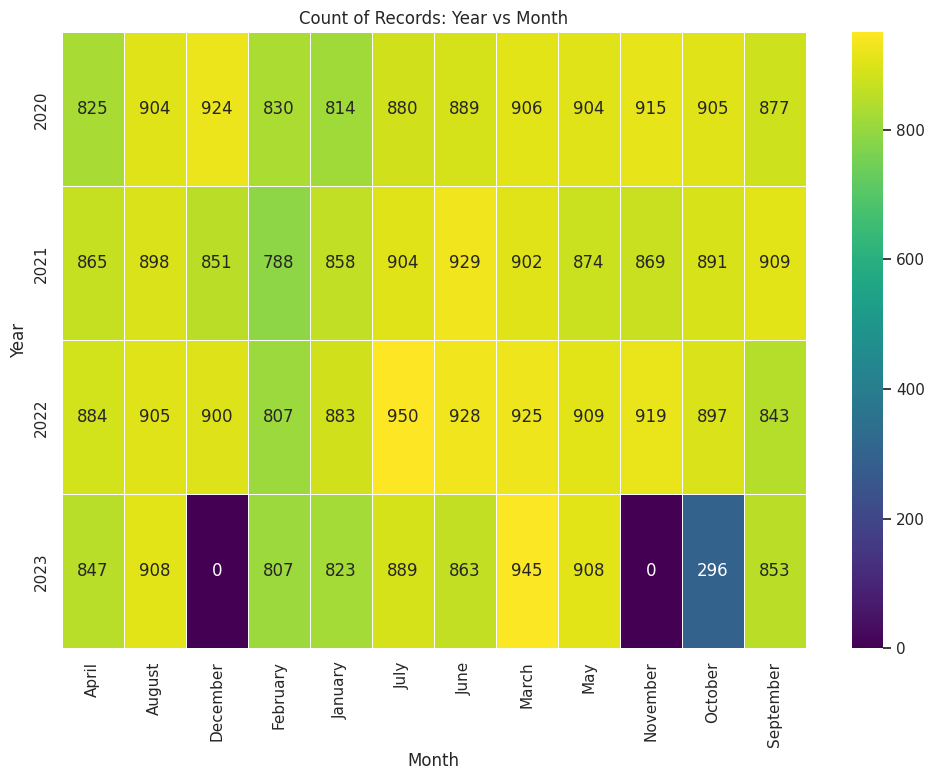

In [65]:
# Create a heatmap with a different color scheme ("viridis")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Count of Records: Year vs Month')
plt.xlabel('Month')
plt.ylabel('Year')

# Display the heatmap
plt.show()

In [59]:
# Display the pivot table
print("Pivot Table - Year vs Month:")
print(pivot_table)


Pivot Table - Year vs Month:
Month  April  August  December  February  January  July  June  March  May  \
Year                                                                        
2020     825     904       924       830      814   880   889    906  904   
2021     865     898       851       788      858   904   929    902  874   
2022     884     905       900       807      883   950   928    925  909   
2023     847     908         0       807      823   889   863    945  908   

Month  November  October  September  
Year                                 
2020        915      905        877  
2021        869      891        909  
2022        919      897        843  
2023          0      296        853  


In [68]:
data['Weekday'] = data['Timestamp'].dt.day_name()

In [70]:
# Generate a pivot table for Month vs Weekday
pivot_table_month_weekday = pd.pivot_table(data, values='Timestamp', index='Month', columns='Weekday', aggfunc='count', fill_value=0)

In [71]:
# Display the pivot table
print("Pivot Table - Month vs Weekday:")
print(pivot_table_month_weekday)

Pivot Table - Month vs Weekday:
Weekday    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Month                                                                    
April         511     496       514     475       496      472        457
August        497     477       511     541       501      558        530
December      383     363       363     338       434      414        380
February      456     472       511     462       422      446        463
January       505     520       476     524       467      464        422
July          531     477       536     528       582      469        500
June          506     518       500     486       532      553        514
March         511     558       468     508       520      596        517
May           531     557       515     540       442      517        493
November      366     406       365     403       371      412        380
October       439     437       437     480       395      409        392
Septem

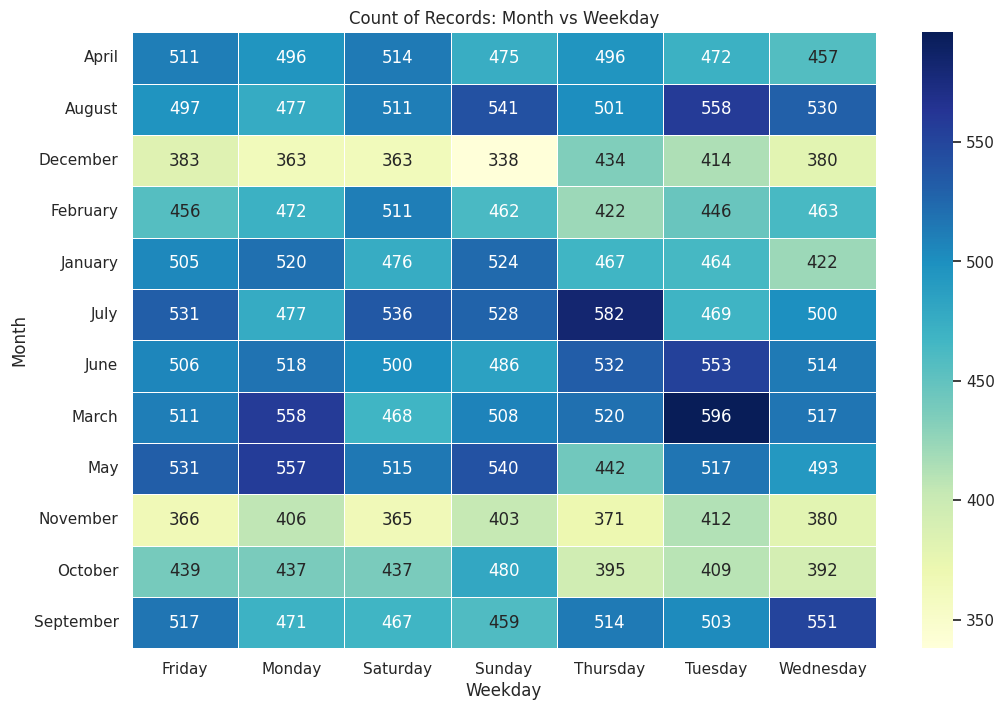

In [72]:
# Create a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_month_weekday, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Count of Records: Month vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Month')

# Display the heatmap
plt.show()

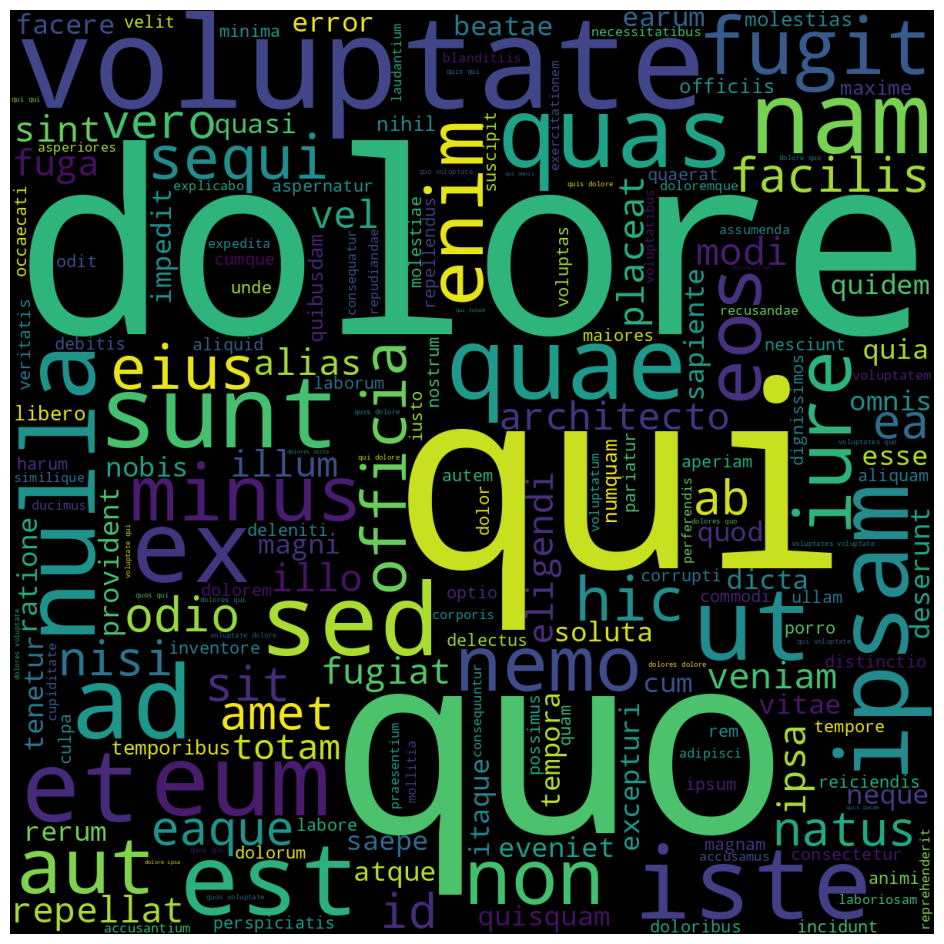

In [73]:
from matplotlib.pyplot import subplots, axis, imshow
from wordcloud import WordCloud


# Convert 'Payload Data' column to a single string
text = ' '.join(data['Payload Data'].astype(str).values)

# Create subplots
fig, ax = subplots(figsize=(12, 12))

# Generate and display the word cloud
wordcloud = WordCloud(random_state=2023, height=1200, width=1200).generate(text)
imshow(wordcloud)
axis('off')

# Show the word cloud
plt.show()
